In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import psiz.models
from wikisim import rsa
from wikisim import model
from wikisim import dsmplot
import importlib

stim_dir = '/Users/morton/Dropbox/data/bender/stimuli'
work_dir = '/Users/morton/Dropbox/work/bender'
model_dir = '/Users/morton/Dropbox/work/bender/batch/models3'

n_perm = 100000

/Users/morton/miniconda3/envs/wikisim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/morton/miniconda3/envs/wikisim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/morton/miniconda3/envs/wikisim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/morton/miniconda3/envs/wikisim

In [2]:
model_names = ['vem', 'sem', 'wiki_w2v', 'wiki_use1', 'geo']
model_labels = ['vem', 'sem', 'w2v', 'use', 'geo']
model_set = model.load_model_set(model_dir, model_names, model_labels=model_labels)

In [3]:
pool_file = os.path.join(stim_dir, 'stimuli.csv')
face_file = os.path.join(work_dir, 'features', 'faces.csv')
scene_file = os.path.join(work_dir, 'features', 'scenes.csv')

In [4]:
face_rdms = model.load_face_rdms(face_file, pool_file)
scene_rdms = model.load_scene_rdms(scene_file, pool_file)

In [5]:
model_set['face'].update(face_rdms)
model_set['scene'].update(scene_rdms)

## Embedding best-fit parameters

In [6]:
param = ['rho', 'tau', 'gamma', 'beta']
for i in range(1, 5):
    emb = psiz.models.load_embedding(os.path.join(work_dir, 'mturk', 
                                                  f'mturk_embed_cond{i}.hdf5'))
    print(f'condition {i}:')
    for par in param:
        print(f'{par}: {getattr(emb, par)}')

condition 1:
rho: 2.986339569091797
tau: 1.183824896812439
gamma: 0.0010943971574306488
beta: 15.466503143310547
condition 2:
rho: 2.2949318885803223
tau: 1.0177093744277954
gamma: 0.0
beta: 21.680620193481445
condition 3:
rho: 2.0772135257720947
tau: 1.364463210105896
gamma: 0.0014181588776409626
beta: 4.689683437347412
condition 4:
rho: 2.1340527534484863
tau: 1.7431288957595825
gamma: 0.0023395109456032515
beta: 23.548219680786133


# Faces

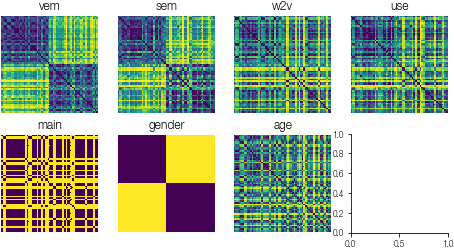

In [7]:
names = ['vem', 'sem', 'w2v', 'use', 'main', 'gender', 'age']
fig, ax = plt.subplots(2, 4, figsize=(8, 4))
n = 0
for i in range(2):
    for j in range(4):
        if n > len(names) - 1:
            break
        dsmplot.plot_dsm(model_set['face'][names[n]], ax=ax[i, j], rank=True)
        ax[i, j].set_title(names[n])
        n += 1

## Do the models predict the embedding?

In [8]:
rsa.model_set_prsa(model_set['face'], ref_name='sem',
                   model_names=['vem', 'use'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.769006
use,4.264893,0.00001,0.629907


In [9]:
rsa.model_set_prsa(model_set['face'], ref_name='sem',
                   model_names=['vem', 'w2v'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.799941
w2v,4.264893,0.00001,0.610465


## Do the models reflect item features?

In [10]:
rsa.model_set_prsa(model_set['face'], ref_name='use',
                   model_names=['main', 'gender', 'age'], n_perm=n_perm)

,z,p,stat
main,4.264893,0.00001,0.769492
gender,4.264893,0.00001,0.224244
age,4.264893,0.00001,0.339094


In [11]:
rsa.model_set_prsa(model_set['face'], ref_name='w2v',
                   model_names=['main', 'gender', 'age'], n_perm=n_perm)

,z,p,stat
main,4.264893,0.00001,0.764470
gender,3.313916,0.00046,0.070766
age,2.704539,0.00342,0.174425


## Do the models explain variance beyond the features?

In [12]:
rsa.model_set_prsa(model_set['face'], ref_name='sem',
                   model_names=['vem', 'use', 'main', 'gender', 'age'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.485915
use,4.264893,0.00001,0.338307
main,4.264893,0.00001,0.260601
gender,4.264893,0.00001,0.288720
age,4.264893,0.00001,0.234316


In [13]:
rsa.model_set_prsa(model_set['face'], ref_name='sem',
                   model_names=['vem', 'w2v', 'main', 'gender', 'age'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.502597
w2v,4.264893,0.00001,0.306581
main,4.264893,0.00001,0.270197
gender,4.264893,0.00001,0.297747
age,4.264893,0.00001,0.299731


# Scenes

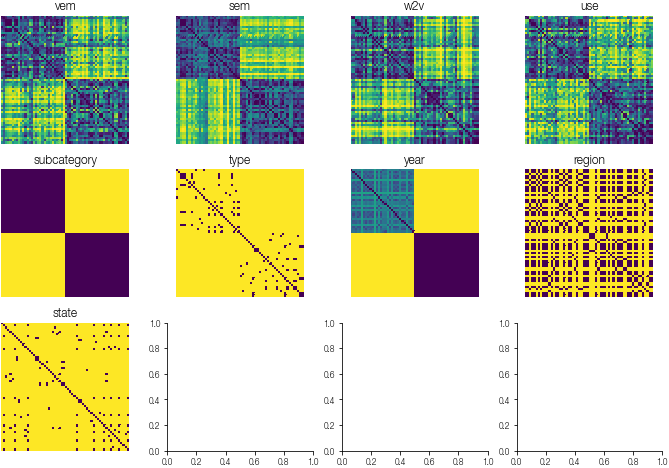

In [14]:
names = ['vem', 'sem', 'w2v', 'use', 'subcategory', 'type', 'year', 'region', 'state']
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
n = 0
for i in range(3):
    for j in range(4):
        if n > len(names) - 1:
            break
        dsmplot.plot_dsm(model_set['scene'][names[n]], ax=ax[i, j], rank=True)
        ax[i, j].set_title(names[n])
        n += 1

## Do the models predict the embedding?

In [15]:
rsa.model_set_prsa(model_set['scene'], ref_name='sem',
                   model_names=['vem', 'use'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.623853
use,4.264893,0.00001,0.587151


In [16]:
rsa.model_set_prsa(model_set['scene'], ref_name='sem',
                   model_names=['vem', 'w2v'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.00001,0.657172
w2v,4.264893,0.00001,0.510791


## Do the models reflect item features?

In [17]:
rsa.model_set_prsa(model_set['scene'], ref_name='use',
                   model_names=['subcategory', 'type', 'year', 'region'], n_perm=n_perm)

,z,p,stat
subcategory,4.264893,0.00001,0.212817
type,4.264893,0.00001,0.195347
year,3.307898,0.00047,0.119940
region,4.264893,0.00001,0.241164


In [18]:
rsa.model_set_prsa(model_set['scene'], ref_name='w2v',
                   model_names=['subcategory', 'type', 'year', 'region'], n_perm=n_perm)

,z,p,stat
subcategory,4.264893,0.000010,0.315432
type,4.264893,0.000010,0.164635
year,-1.336340,0.909281,-0.046931
region,4.264893,0.000010,0.320908


## Do the models explain variance beyond the features?

In [19]:
rsa.model_set_prsa(model_set['scene'], ref_name='sem',
                   model_names=['vem', 'use', 'subcategory', 'type', 'year', 'region'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.000010,0.493670
use,4.264893,0.000010,0.386688
subcategory,4.264893,0.000010,0.337909
type,4.107482,0.000020,0.101536
year,0.316672,0.375746,0.005100
region,-1.235894,0.891751,-0.070234


In [20]:
rsa.model_set_prsa(model_set['scene'], ref_name='sem',
                   model_names=['vem', 'w2v', 'subcategory', 'type', 'year', 'region'], n_perm=n_perm)

,z,p,stat
vem,4.264893,0.000010,0.504558
w2v,4.264893,0.000010,0.330835
subcategory,4.264893,0.000010,0.300560
type,4.264893,0.000010,0.118862
year,2.155539,0.015560,0.067691
region,-1.482006,0.930831,-0.083720


## Which model is better?

### People

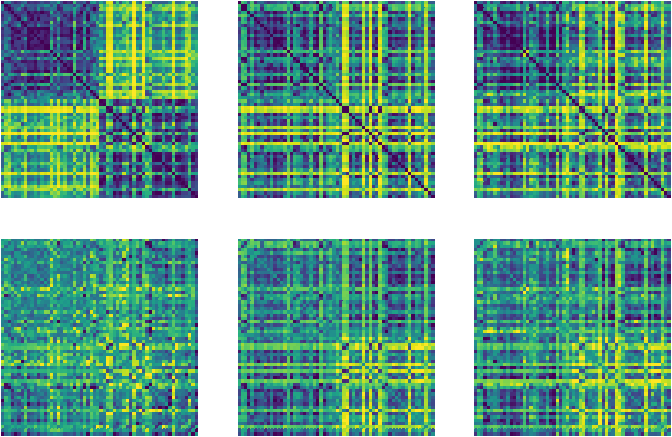

In [21]:
vem = rsa.rank_dsm(model_set['face']['vem'])

sem = rsa.rank_dsm(model_set['face']['sem'])
sem_resid = rsa.resid_rdm(sem, [vem])

w2v = rsa.rank_dsm(model_set['face']['w2v'])
w2v_resid = rsa.resid_rdm(w2v, [vem])

use = rsa.rank_dsm(model_set['face']['use'])
use_resid = rsa.resid_rdm(use, [vem])

fig, ax = plt.subplots(2, 3, figsize=(12, 8));
dsmplot.plot_dsm(sem, ax=ax[0, 0]);
dsmplot.plot_dsm(sem_resid, ax=ax[1, 0]);
dsmplot.plot_dsm(w2v, ax=ax[0, 1]);
dsmplot.plot_dsm(w2v_resid, ax=ax[1, 1]);
dsmplot.plot_dsm(use, ax=ax[0, 2]);
dsmplot.plot_dsm(use_resid, ax=ax[1, 2]);

In [22]:
t, p, df = rsa.compare_rdm_corr(sem_resid, w2v_resid, use_resid)
print(f't({n - 3})={t:.2f}, p={p}')

t(6)=-1.58, p=0.11542841155970662


### Places

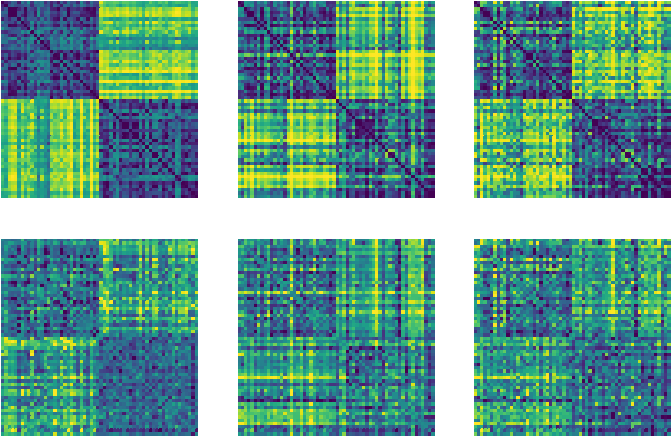

In [23]:
vem = rsa.rank_dsm(model_set['scene']['vem'])

sem = rsa.rank_dsm(model_set['scene']['sem'])
sem_resid = rsa.resid_rdm(sem, [vem])

w2v = rsa.rank_dsm(model_set['scene']['w2v'])
w2v_resid = rsa.resid_rdm(w2v, [vem])

use = rsa.rank_dsm(model_set['scene']['use'])
use_resid = rsa.resid_rdm(use, [vem])

fig, ax = plt.subplots(2, 3, figsize=(12, 8));
dsmplot.plot_dsm(sem, ax=ax[0, 0]);
dsmplot.plot_dsm(sem_resid, ax=ax[1, 0]);
dsmplot.plot_dsm(w2v, ax=ax[0, 1]);
dsmplot.plot_dsm(w2v_resid, ax=ax[1, 1]);
dsmplot.plot_dsm(use, ax=ax[0, 2]);
dsmplot.plot_dsm(use_resid, ax=ax[1, 2]);

In [24]:
t, p, df = rsa.compare_rdm_corr(sem_resid, w2v, use)
print(f't({n - 3})={t:.2f}, p={p}')

t(6)=-4.72, p=2.5175787574660546e-06
